In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Electronics Dataset EDA and Cleaning

## Cleaning

In [ ]:
folder_path = '/content/drive/My Drive/266_project/data/Electronics_data.csv'

In [ ]:
star_mappings = {1.0 : '1 Star', 2.0 : '2 Stars', 3.0 : '3 Stars', 4.0: '4 Stars', 5.0: '5 Stars'}

In [ ]:
df = pd.read_csv(folder_path)
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewDate
0,5.0,2,True,"11 4, 2015",A1GSJ41Z4YNMI5,059449771X,Adrienne Boswell,"This was exactly what it said it was, the genu...","This was exactly what it said it was, the ...",2015-11-04
1,5.0,2,True,"04 4, 2015",A3L8TSOYOBM7LE,059449771X,steven lapham,this works great. got a generic one from someb...,this works great. got a generic one from someb...,2015-04-04
2,5.0,4,True,"02 18, 2017",A1JHNR71TPEETW,073530498X,Amazon Customer,I bought this to display some vintage photos t...,Great way to showcase vintage photos!,2017-02-18
3,5.0,2,True,"12 26, 2016",AU7SO8B4M5UBA,073530498X,ruth,Cute! Bought 2 for my daughter. I thought it w...,They are nice.,2016-12-26
4,5.0,3,True,"05 3, 2015",A1X6761FMCSES2,073530498X,Laci,I like this album. Sturdy front and back. Nice...,too cute,2015-05-03


In [ ]:
stripped_df = df.drop(columns=['vote', 'verified', 'reviewTime', 'reviewerID', 'asin','reviewerName'])
stripped_df['stars'] =  stripped_df['overall'].map(star_mappings)
stripped_df = stripped_df.dropna()

In [ ]:
stripped_df['reviewLength'] = stripped_df['reviewText'].apply(lambda x: len(x.split()))
stripped_df = stripped_df[stripped_df['reviewLength'] > 1]

## EDA

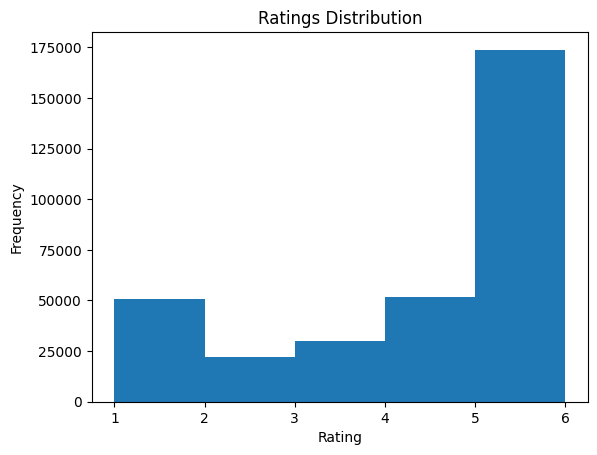

In [ ]:
plt.hist(stripped_df['overall'], bins = range(1,7))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Ratings Distribution")
plt.show()

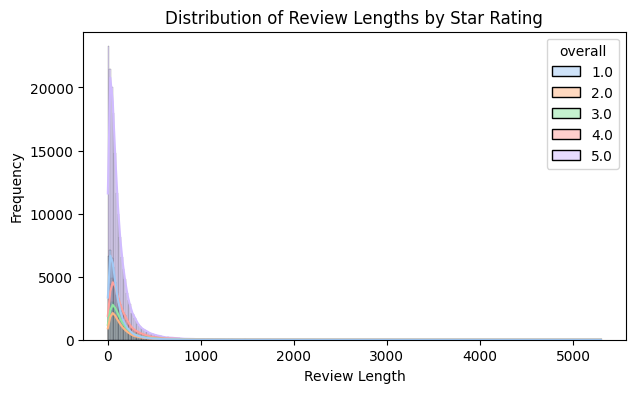

In [ ]:
plt.figure(figsize=(x, 4))
sns.histplot(data=stripped_df, x='reviewLength', hue='overall', bins=300, kde=True, palette="pastel")
plt.title('Distribution of Review Lengths by Star Rating')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
stripped_df['reviewLength'].describe()

count    328961.000000
mean        132.481328
std         165.163239
min           2.000000
25%          41.000000
50%          84.000000
75%         163.000000
max        5300.000000
Name: reviewLength, dtype: float64

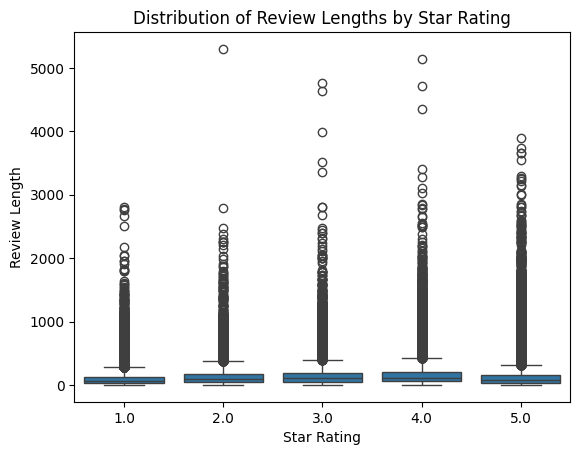

In [ ]:
sns.boxplot(data=stripped_df, x='overall', y='reviewLength')
plt.title('Distribution of Review Lengths by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

In [ ]:
stopWords = set(stopwords.words('english'))
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopWords])

    return review
stripped_df['cleanedText'] = stripped_df['reviewText'].apply(clean)

In [ ]:
for star_rating in sorted(stripped_df['stars'].unique()):
    subset = stripped_df[stripped_df['stars'] == star_rating]
    words = subset['cleanedText'].str.split()
    flat_words = [word for sublist in words for word in sublist]
    top_10_words = pd.Series(flat_words).value_counts().head(10)
    print(f'Top 10 Words for Star Rating {star_rating}:')
    print(top_10_words)

Top 10 Words for Star Rating 1 Star:
one        24131
would      19233
work       17469
get        17176
product    13979
use        13640
time       13557
even       13076
back       13027
like       12496
Name: count, dtype: int64
Top 10 Words for Star Rating 2 Stars:
one      12262
would    11366
get       9498
use       9231
like      9148
work      8048
good      7597
time      6696
even      6509
back      6363
Name: count, dtype: int64
Top 10 Words for Star Rating 3 Stars:
one       17017
would     15636
use       14483
like      14026
good      13603
get       13317
work      10355
camera     9448
well       9053
dont       8842
Name: count, dtype: int64
Top 10 Words for Star Rating 4 Stars:
one       32030
use       28342
good      27974
like      27136
would     26526
get       22616
great     22210
well      20390
camera    18229
also      16113
Name: count, dtype: int64
Top 10 Words for Star Rating 5 Stars:
great    82663
one      82347
use      71674
like     61901
good   

# Clothing, Shoes, and Jewelry EDA and cleaning

## Cleaning

In [ ]:
folder_path = '/content/drive/My Drive/266_project/data/Clothing_Shoes_and_Jewelry_data.csv'

In [ ]:
df_2 = pd.read_csv(folder_path)
df_2.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,reviewDate
0,5.0,2,True,"04 5, 2017",A11VYN8DIT7TN7,1519588135,Liz L,Couldn't wait to get to the next .,Good read!,1491350400,2017-04-05
1,1.0,2,True,"03 26, 2017",A3ALJLQAL0AUS9,1519588135,CCH,I'm not a fan of emotionally weak women or sel...,Didn't like it,1490486400,2017-03-26
2,4.0,7,True,"03 4, 2017",A15S96FNISMN5Y,1519588135,HugsBugs2,Good read ....,Four Stars,1488585600,2017-03-04
3,3.0,2,True,"08 13, 2016",A2RS58B2MO93F8,1519588135,Lisabug1021,I'm not certain how I feel about this book or ...,Good but takes a few strange leaps,1471046400,2016-08-13
4,5.0,6,True,"05 6, 2016",A23OP5RROH5PP5,1519588135,Kindle Customer,Jeannette writes in a way that captures me. I...,Can't wait for more,1462492800,2016-05-06


In [ ]:
stripped_df_2 = df_2.drop(columns=['vote', 'verified', 'reviewTime', 'reviewerID', 'asin','reviewerName'])
stripped_df_2['stars'] =  stripped_df_2['overall'].map(star_mappings)
stripped_df_2 = stripped_df_2.dropna()

In [ ]:
stripped_df_2['reviewLength'] = stripped_df_2['reviewText'].apply(lambda x: len(x.split()))
stripped_df_2 = stripped_df_2[stripped_df_2['reviewLength'] > 1]

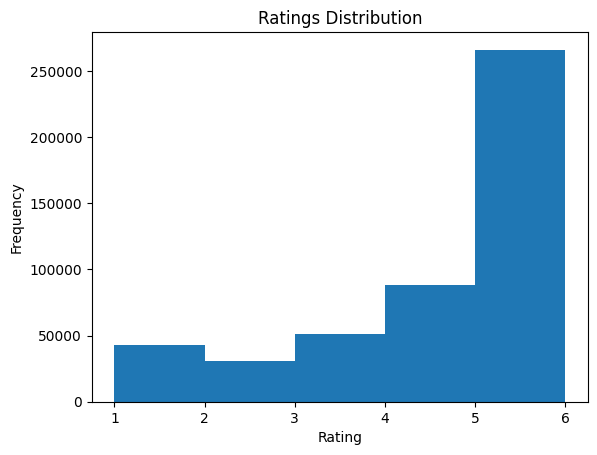

In [ ]:
plt.hist(stripped_df_2['overall'], bins = range(1,7))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Ratings Distribution")
plt.show()

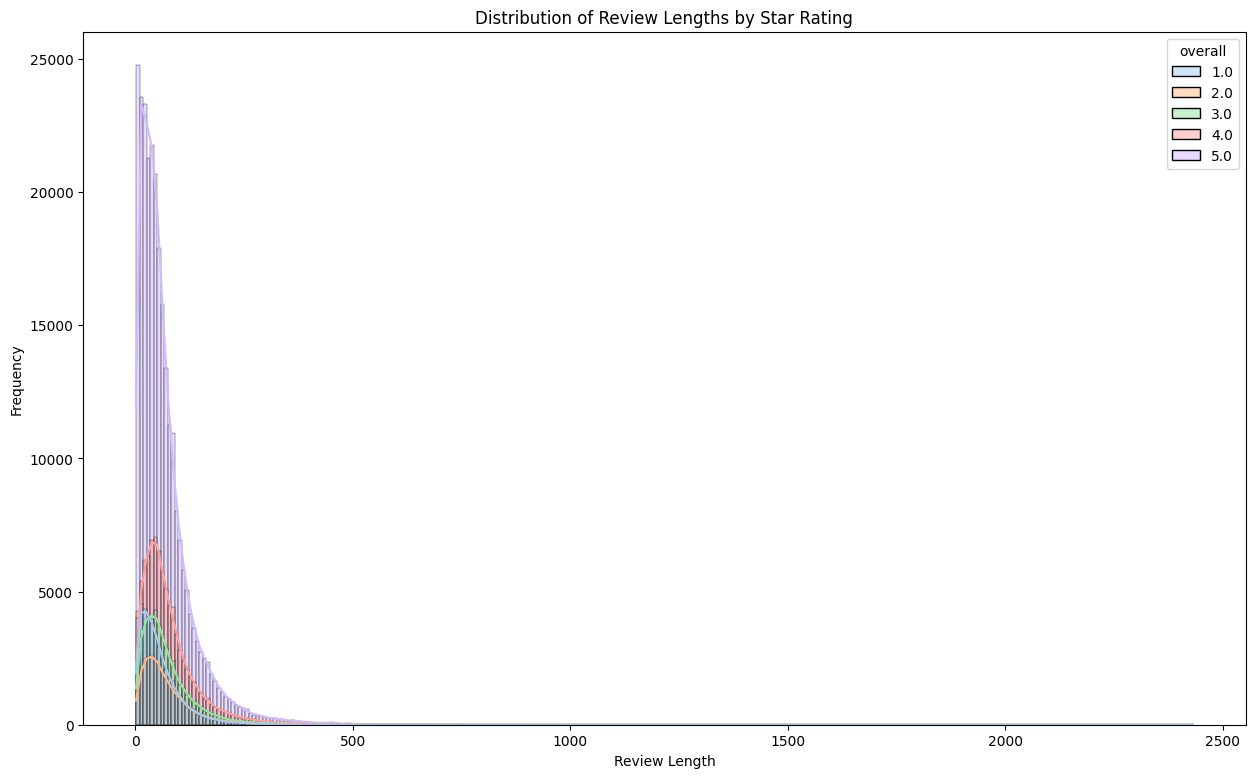

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data=stripped_df_2, x='reviewLength', hue='overall', bins=300, kde=True, palette="pastel")
plt.title('Distribution of Review Lengths by Star Rating')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
stripped_df_2['reviewLength'].describe()

count    479554.000000
mean         70.375169
std          70.125005
min           2.000000
25%          27.000000
50%          52.000000
75%          90.000000
max        2431.000000
Name: reviewLength, dtype: float64

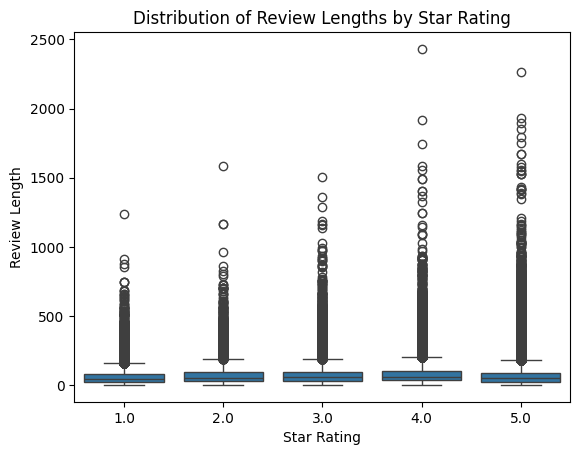

In [ ]:
sns.boxplot(data=stripped_df_2, x='overall', y='reviewLength')
plt.title('Distribution of Review Lengths by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

In [ ]:
stripped_df_2['cleanedText'] = stripped_df_2['reviewText'].apply(clean)

In [ ]:
for star_rating in sorted(stripped_df_2['stars'].unique()):
    subset = stripped_df_2[stripped_df_2['stars'] == star_rating]
    words = subset['cleanedText'].str.split()
    flat_words = [word for sublist in words for word in sublist]
    top_10_words = pd.Series(flat_words).value_counts().head(10)
    print(f'Top 10 Words for Star Rating {star_rating}:')
    print(top_10_words)

Top 10 Words for Star Rating 1 Star:
like       14098
size       13062
one         9989
would       9840
fit         9559
shoes       9142
wear        8373
small       8072
even        7491
ordered     7052
Name: count, dtype: int64
Top 10 Words for Star Rating 2 Stars:
size      13304
like      12813
fit       10292
would      9891
wear       8587
shoes      7369
one        7236
small      7188
im         6592
really     5844
Name: count, dtype: int64
Top 10 Words for Star Rating 3 Stars:
size      25155
like      21772
fit       18495
would     17169
wear      16243
im        12460
small     11936
one       11755
shoes     10857
really    10428
Name: count, dtype: int64
Top 10 Words for Star Rating 4 Stars:
size      48544
like      39607
fit       34677
wear      33920
would     29466
little    25996
im        25873
great     22555
good      21496
one       20752
Name: count, dtype: int64
Top 10 Words for Star Rating 5 Stars:
size           106308
love            96840
fit          

# Baseline Models

## Electronics Dataset





### Data Processing

In [ ]:
stripped_df['starNumeral'] = stripped_df['overall'].astype(int)
stripped_df['starCounts'] = stripped_df['starNumeral'] - 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X = stripped_df[['reviewText']]
y = stripped_df[['starCounts']]

In [ ]:
def data_split(X, y, test_split = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(X, y)

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['reviewText'])
X_test_vec = vectorizer.transform(X_test['reviewText'])


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=80, max_depth=20, random_state=42)
rf_classifier.fit(X_train_vec, y_train)
train_preds = rf_classifier.predict(X_train_vec)
test_preds = rf_classifier.predict(X_test_vec)
print("Training Accuracy: " , accuracy_score(train_preds, y_train))
print("Test Accuracy: " , accuracy_score(test_preds, y_test))

Training Accuracy:  0.5337161053015564
Test Accuracy:  0.5264997796118128


In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.00      0.00     10191
           1       0.60      0.00      0.00      4549
           2       1.00      0.00      0.00      6000
           3       0.54      0.00      0.00     10428
           4       0.53      1.00      0.69     34625

    accuracy                           0.53     65793
   macro avg       0.70      0.20      0.14     65793
weighted avg       0.62      0.53      0.36     65793



## Clothing, Shoes, and Jewelry Dataset

### Data Processing

In [ ]:
stripped_df_2['starNumeral'] = stripped_df_2['overall'].astype(int)
stripped_df_2['starCounts'] = stripped_df_2['starNumeral'] - 1

In [ ]:
X = stripped_df_2[['reviewText']]
y = stripped_df_2[['starCounts']]

In [ ]:
def data_split(X, y, test_split = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(X, y)

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['reviewText'])
X_test_vec = vectorizer.transform(X_test['reviewText'])

### Random Forest Classifier



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=80, max_depth=20, random_state=42)
rf_classifier.fit(X_train_vec, y_train)
train_preds = rf_classifier.predict(X_train_vec)
test_preds = rf_classifier.predict(X_test_vec)
print("Training Accuracy: " , accuracy_score(train_preds, y_train))
print("Test Accuracy: " , accuracy_score(test_preds, y_test))
print(classification_report(y_test, test_preds))

Training Accuracy:  0.5564861081786974
Test Accuracy:  0.5558173723556213
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      8565
           1       1.00      0.00      0.01      6245
           2       0.96      0.00      0.00     10170
           3       0.93      0.00      0.00     17693
           4       0.56      1.00      0.71     53238

    accuracy                           0.56     95911
   macro avg       0.89      0.20      0.15     95911
weighted avg       0.74      0.56      0.40     95911

